###1 - Загрузите файл в Pandas dataframe

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB



###2 - Рассчитайте основные статистики для переменных

In [4]:
#Основные статистики по всем столбцам
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [18]:
#Расчет мин и макс

#Какой максиммальный и минимальный уровень удовлетворения работой?
print('Максимальный уровень удовлетворения работой', max(df['satisfaction_level'])*100,'%')
print('Минимальный уровень удовлетворения работой', min(df['satisfaction_level'])*100,'%')
print()

#Какие максиммальные и минимальные средние отработанные часы за месяц?
print('Максимальные отработанные часы за месяц', max(df['average_montly_hours']))
print('Минимальные отработанные часы за месяц', min(df['average_montly_hours']))

Максимальный уровень удовлетворения работой 100.0 %
Минимальный уровень удовлетворения работой 9.0 %

Максимальные отработанные часы за месяц 310
Минимальные отработанные часы за месяц 96


In [19]:
#Расчет среднего

#Какой средний стаж работы сотрудников в компании?
print('Средний стаж по всем сотрудникам составляет', round(sum(df['time_spend_company'])/len(df['time_spend_company']),1),'года')

Средний стаж по всем сотрудникам составляет 3.5 года


In [20]:
#Расчет медианы

import numpy as np
#Середина данных в сроках оценки сотрудников?
print(np.median(df['last_evaluation']))

0.72


In [22]:
#Расчет моды

#Какого уровня заработных плат больше?
print('Наиболее часто встречается уровень з/п:', df['salary'].mode()[0])

наиболее часто встречается уровень з/п: low


In [25]:
#Расчет СКО

#Какое в компании СКО по кол-ву выполненных проектов?
print(round(df['number_project'].std(),2))

1.23


###3 - Корреляция

In [31]:
#Создадим датафрейм только с количественными данными
#Все столбцы, кроме 'department', 'salary'

df_1 = df.loc[:, ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']]

In [ ]:
df_1.head()

In [27]:
import seaborn as sns

<Axes: >

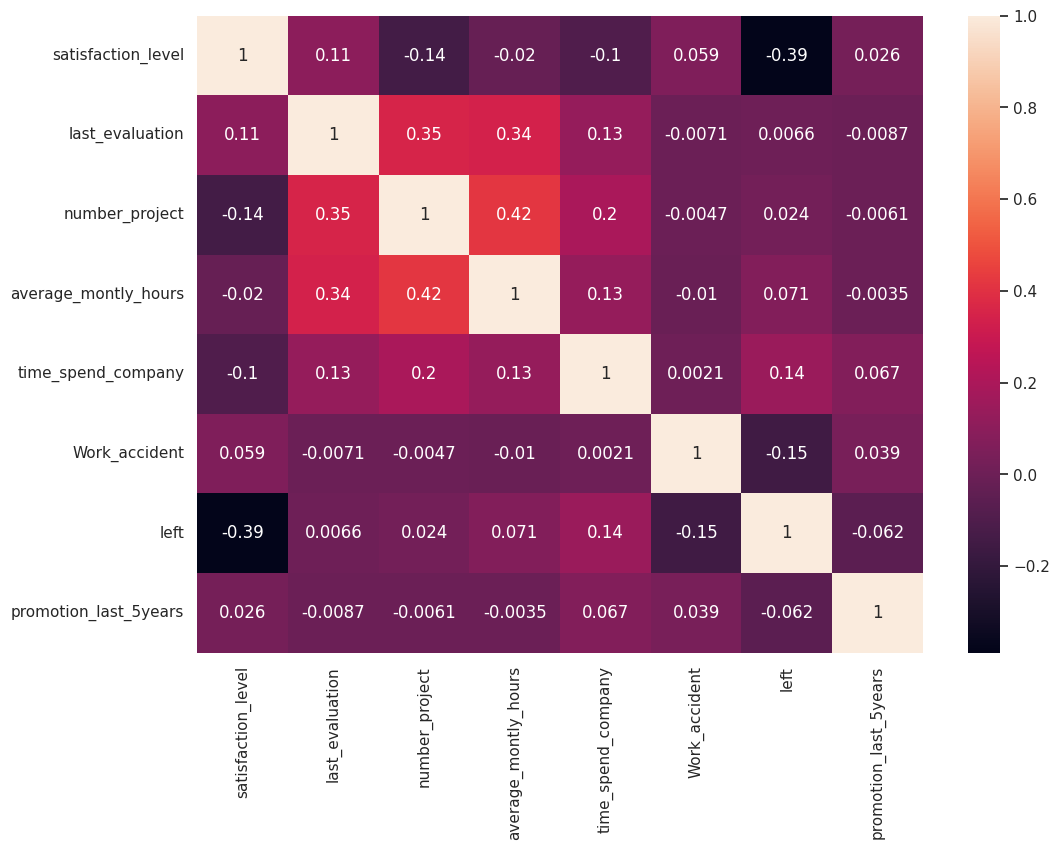

In [33]:
#Корреляционная матрица на тепловой карте

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(df_1.corr(), annot=True)

In [ ]:
#Cогласно кор. матрице видим следующие зависимости:

#Между средними отработанными часами за месяц (average_montly_hours) и кол-вом проектов (number_project) существует прямая заимосвязь среднего уровня (0,42) 
#Т.е. чем больше проектов, тем дольше сотрудник провел времени на работе. <- Наиболее скоррелированные переменные

#С другой стороны, две наименее скоррелированые переменные это promotion_last_5years и average_montly_hours. коэф. корреляции всего -0,0035

###4 - Рассчитайте сколько сотрудников работает в каждом департаменте

In [34]:
#Если исходить из логики, что каждая строка это отдельный сотрудник
#То, кол-во сотрудников это по сути кол-во строк по значению столбца 'department'
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

<Axes: title={'center': 'Кол-во сотрудников по департаментам'}, xlabel='Департамент', ylabel='Кол-во сотрудников'>

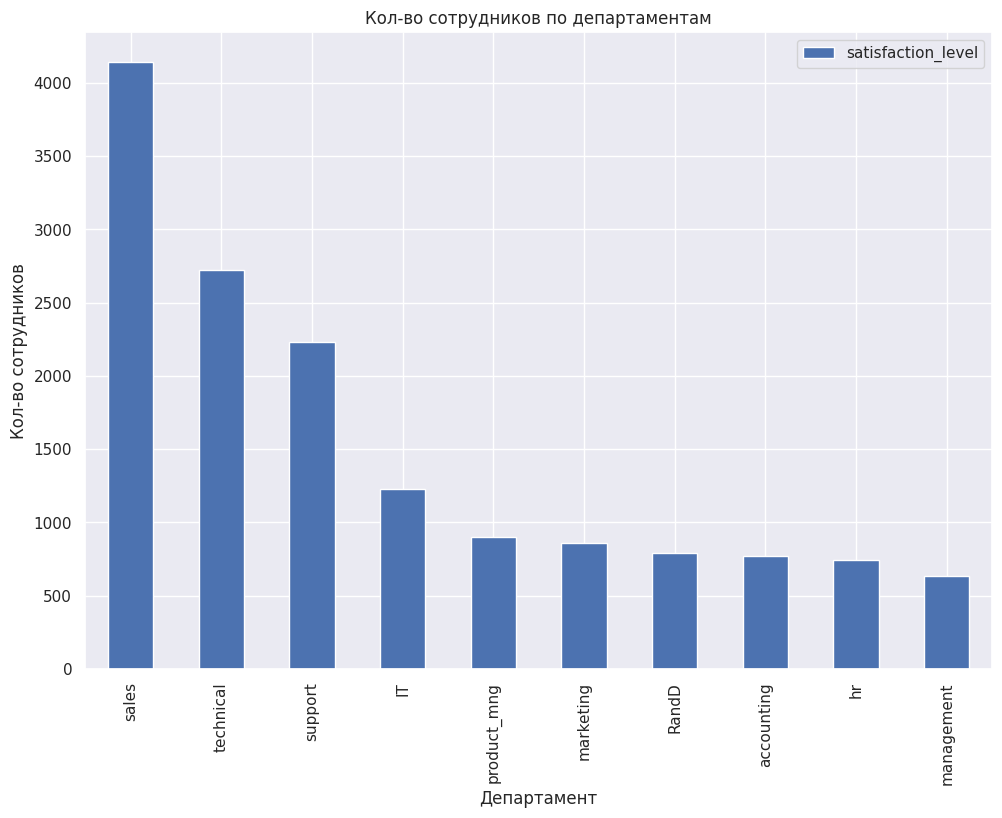

In [47]:
#Покажем на гистограмме

import matplotlib.pyplot as plt

numbers = df[['satisfaction_level', 'department']].groupby('department').count()
numbers.sort_values(by='satisfaction_level', ascending=False).plot(kind='bar',
             title = 'Кол-во сотрудников по департаментам',
             xlabel = 'Департамент',
              ylabel = 'Кол-во сотрудников')

###5 - Показать распределение сотрудников по заработным платам

In [70]:
#Отразим цифры по распределению

high = df[df['salary'] == 'high']
med = df[df['salary'] == 'medium']
low = df[df['salary'] == 'low']

print('Доля сотрудников с низким уровнем з/п:', round((low['salary'].count()/df['salary'].count())*100,1), '%')
print('Доля сотрудников со средним уровнем з/п:', round((med['salary'].count()/df['salary'].count())*100,1), '%')
print('Доля сотрудников с высоким уровнем з/п:', round((high['salary'].count()/df['salary'].count())*100,1), '%')

Доля сотрудников с низким уровнем з/п: 48.8 %
Доля сотрудников со средним уровнем з/п: 43.0 %
Доля сотрудников с высоким уровнем з/п: 8.2 %


<Axes: title={'center': 'Кол-во сотрудников по уровням оплаты'}, xlabel='Уровень оплаты', ylabel='Кол-во сотрудников'>

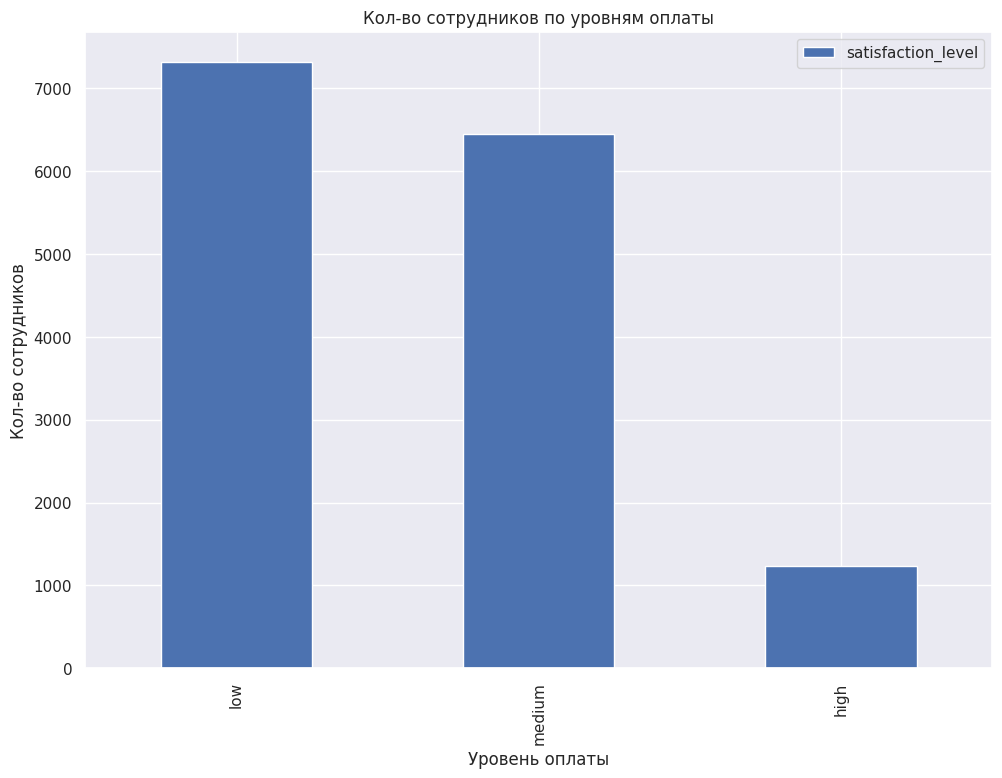

In [71]:
numbers = df[['satisfaction_level', 'salary']].groupby('salary').count()
numbers.sort_values(by='satisfaction_level', ascending=False).plot(kind='bar',
             title = 'Кол-во сотрудников по уровням оплаты',
             xlabel = 'Уровень оплаты',
              ylabel = 'Кол-во сотрудников')

###6 - Показать распределение сотрудников по заработным платам в каждом департаменте по отдельности

In [99]:
#Интереснее будет показать в каких долях по каждому отделу распределен уровень оплаты.

income = df.loc[:, ['satisfaction_level', 'salary', 'department']]
round(income.groupby(['department', 'salary']).count()/income.groupby(['department']).count()*100,1)

#Видим, что отдел accounting	имеет 9,6 % высоких заработных плат из общего кол-ва - это самый большой показатель по компании.

salary  satisfaction_level
department  salary                            
IT          high       NaN                 6.8
            low        NaN                49.6
            medium     NaN                43.6
RandD       high       NaN                 6.5
            low        NaN                46.3
            medium     NaN                47.3
accounting  high       NaN                 9.6
            low        NaN                46.7
            medium     NaN                43.7
hr          high       NaN                 6.1
            low        NaN                45.3
            medium     NaN                48.6
management  high       NaN                35.7
            low        NaN                28.6
            medium     NaN                35.7
marketing   high       NaN                 9.3
            low        NaN                46.9
            medium     NaN                43.8
product_mng high       NaN                 7.5
            low        NaN                50.0
            medium     NaN                42.5
sales       high       NaN                 6.5
            low        NaN                50.7
            medium     NaN                42.8
support     high       NaN                 6.3
            low        NaN                51.4
            medium     NaN                42.3
technical   high       NaN                 7.4
            low        NaN                50.4
            medium     NaN                42.2

###7 -  Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким.

In [106]:
#Разделим дата фрейм на две базы по окладу (high и low)

high = df[df['salary'] == 'high']
low = df[df['salary'] == 'low']

#Посчитаем среднее время по первой и второй базе
print('Среднее время проведенное на работе:')
print('У сотрудников с высоким окладом:', round(high['average_montly_hours'].mean(),0), 'ч./мес.')
print('У сотрудников с низким окладом:', round(low['average_montly_hours'].mean(),0), 'ч./мес.')
print('Вывод:')
print('Т.к. сотрудники с низким окладом проводят на работе в среднем 201 час в месяц, что больше времени, которое проводят сотрудники с высоким окладом (200 часов), то гипотеза неверна')

Среднее время проведенное на работе:
У сотрудников с высоким окладом: 200.0 ч./мес.
У сотрудников с низким окладом: 201.0 ч./мес.
Вывод:
Т.к. сотрудники с низким окладом проводят на работе в среднем 201 час в месяц, что больше времени, которое проводят сотрудники с высоким окладом (200 часов), то гипотеза неверна


###8 - Расcчитать показатели для уволившихся и не уволившихся сотрудников

In [ ]:
#Создадим две базы с уволенными (fire) и не уволенными (not_fire)
fire = df[df['left'] == 1]
not_fire = df[df['left'] == 0]

In [115]:
#Доля сотрудников с повышением за последние 5 лет

promotion = fire[fire['promotion_last_5years'] == 1]
promotion_1 = not_fire[not_fire['promotion_last_5years'] == 1]

print('Доля сотрудников с повышением за последние 5 лет среди уволенных:', round((promotion['promotion_last_5years'].count()/fire['promotion_last_5years'].count())*100,1), '%')
print('Доля сотрудников с повышением за последние 5 лет среди НЕ уволенных:', round((promotion_1['promotion_last_5years'].count()/not_fire['promotion_last_5years'].count())*100,1), '%')

Доля сотрудников с повышением за последние 5 лет среди уволенных: 0.5 %
Доля сотрудников с повышением за последние 5 лет среди НЕ уволенных: 2.6 %


In [126]:
#Средняя степень удовлетворенности

print('Средняя доля удовлетворенности среди уволенных:', round(fire['satisfaction_level'].mean()*100,1), '%')
print('Средняя доля удовлетворенности среди НЕ уволенных:', round(not_fire['satisfaction_level'].mean()*100,1), '%')

Средняя доля удовлетворенности среди уволенных: 44.0 %
Средняя доля удовлетворенности среди НЕ уволенных: 66.7 %


In [128]:
#Среднее кол-во проектов

print('Среднее кол-во проектов среди уволенных:', round(fire['number_project'].mean(),1))
print('Среднее кол-во проектов среди НЕ уволенных:', round(not_fire['number_project'].mean(),1))

Среднее кол-во проектов среди уволенных: 3.9
Среднее кол-во проектов среди НЕ уволенных: 3.8
